In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = pd.read_csv(mouse_drug_data_to_load)
clintrialdata = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combodata = pd.merge(mousedata,clintrialdata,on="Mouse ID")

# Display the data table for preview
combodata.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grpdrugtpt = combodata.groupby(["Drug","Timepoint"])
meantumorvolgrouped = grpdrugtpt["Tumor Volume (mm3)"].sum()/grpdrugtpt["Tumor Volume (mm3)"].count()
# Convert to DataFrame
meantumorvoldf = pd.DataFrame(meantumorvolgrouped)
meantumorvoldf = meantumorvoldf.reset_index()
# Preview DataFrame
meantumorvoldf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semtumorvolgrouped = grpdrugtpt["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
semtumorvoldf = pd.DataFrame(semtumorvolgrouped)
semtumorvoldf = semtumorvoldf.reset_index()
# Preview DataFrame
semtumorvoldf.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
meantumorvoldf_P = meantumorvoldf.pivot(index="Timepoint",columns="Drug", values = "Tumor Volume (mm3)")
semtumorvoldf_P = semtumorvoldf.pivot(index="Timepoint",columns="Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
meantumorvoldf_P.head()
semtumorvoldf_P.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


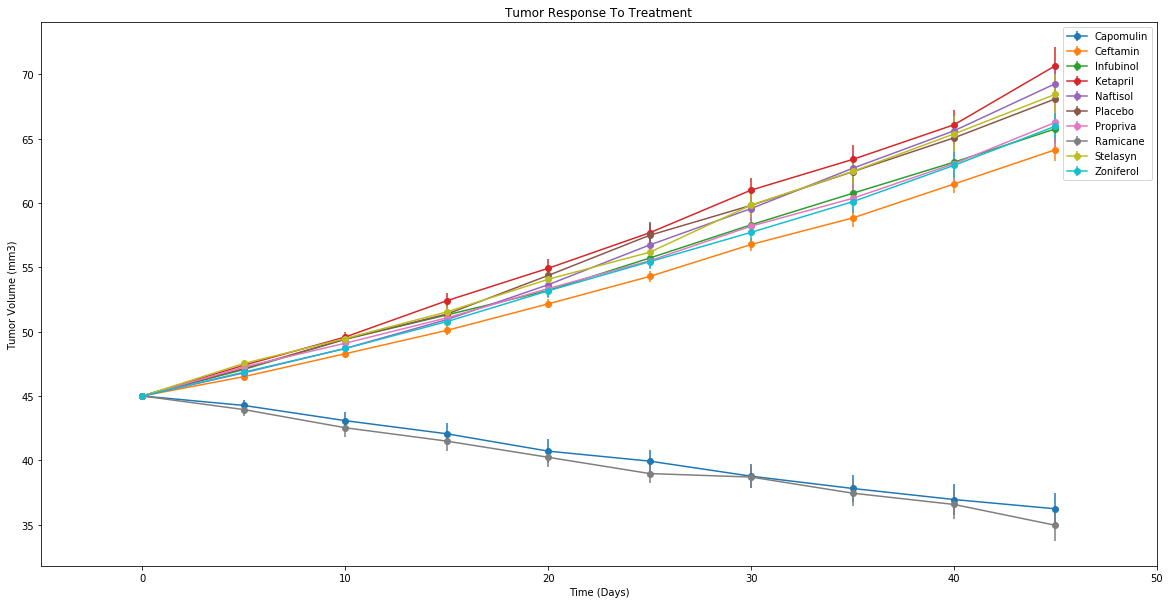

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
x_axis = semtumorvoldf_P.index.unique().tolist()
drugnames = semtumorvoldf_P.columns.unique().tolist()
for drug in drugnames:
    ax.errorbar(x_axis, meantumorvoldf_P[drug], semtumorvoldf_P[drug],marker='o',label=drug)

fig.set_figheight(10)
fig.set_figwidth(20)
plt.xlim(-5,50)
plt.ylabel("Tumor Volume (mm3)") 
plt.xlabel("Time (Days)")
plt.title("Tumor Response To Treatment")
plt.legend(loc="best")
# Save the Figure
plt.savefig("TumorResponseToTreatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanmetsitegrouped = grpdrugtpt["Metastatic Sites"].sum()/grpdrugtpt["Metastatic Sites"].count()

# Convert to DataFrame
meanmetsitedf = pd.DataFrame(meanmetsitegrouped)
meanmetsitedf = meanmetsitedf.reset_index()
# Preview DataFrame
meanmetsitedf.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semmetsitegrouped = grpdrugtpt["Metastatic Sites"].sem()
# Convert to DataFrame
semmetsitedf = pd.DataFrame(semmetsitegrouped)
semmetsitedf = semmetsitedf.reset_index()
# Preview DataFrame
semmetsitedf.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
meanmetsitedf_P = meanmetsitedf.pivot(index="Timepoint",columns="Drug", values = "Metastatic Sites")
semmetsitedf_P = semmetsitedf.pivot(index="Timepoint",columns="Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
meanmetsitedf_P.head()
semmetsitedf_P.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


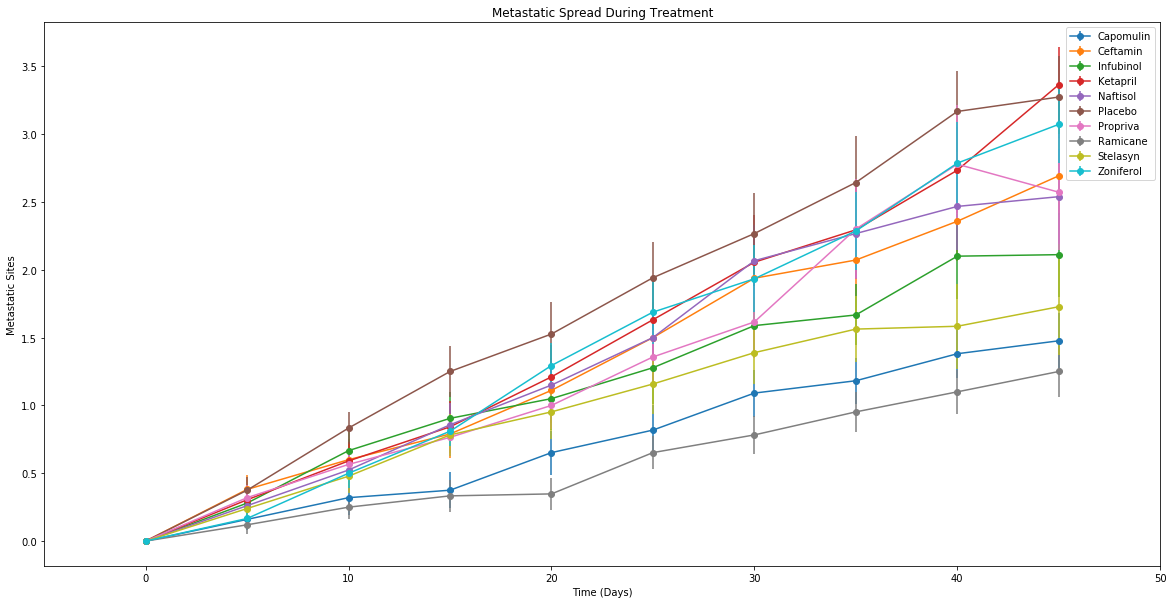

In [9]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
x_axis = semmetsitedf_P.index.unique().tolist()
drugnames = semmetsitedf_P.columns.unique().tolist()
for drug in drugnames:
    ax.errorbar(x_axis, meanmetsitedf_P[drug], semmetsitedf_P[drug],marker='o',label=drug)

fig.set_figheight(10)
fig.set_figwidth(20)
plt.xlim(-5,50)
plt.ylabel("Metastatic Sites") 
plt.xlabel("Time (Days)")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best")
# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecountgrouped = grpdrugtpt["Mouse ID"].count()

# Convert to DataFrame
micecountdf = pd.DataFrame(micecountgrouped)
micecountdf = micecountdf.reset_index()
# Preview DataFrame
micecountdf.head()

micecountbase = micecountdf.loc[micecountdf["Timepoint"] == 0]

micecountbase = micecountbase.rename(columns={"Mouse ID":"Base Count"})
micecountbasedf = micecountbase[["Drug","Base Count"]]

micepcts = pd.merge(micecountdf,micecountbasedf,on="Drug")
micepcts["Percentage Surviving"] = micepcts["Mouse ID"]/micepcts["Base Count"]*100
micepcts.head()

,Drug,Timepoint,Mouse ID,Base Count,Percentage Surviving
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0


In [11]:
# Minor Data Munging to Re-Format the Data Frames
micepcts_P = micepcts.pivot(index="Timepoint",columns="Drug", values = "Percentage Surviving")
# Preview that Reformatting worked
micepcts_P.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


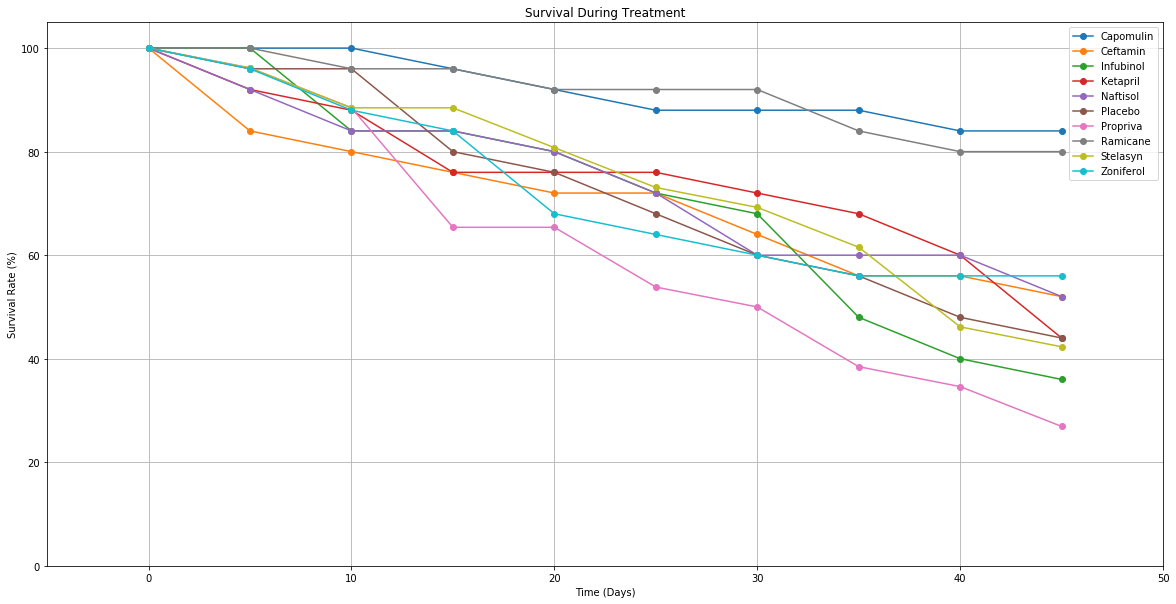

In [12]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
x_axis = micepcts_P.index.unique().tolist()
drugnames = micepcts_P.columns.unique().tolist()
for drug in drugnames:
    ax.plot(x_axis, micepcts_P[drug],marker='o',label=drug)

fig.set_figheight(10)
fig.set_figwidth(20)
plt.ylabel("Survival Rate (%)") 
plt.xlabel("Time (Days)")
plt.title("Survival During Treatment")
plt.legend(loc="best")
plt.ylim(0, 105)
plt.xlim(-5,50)
plt.grid()
# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
basetumorsize = meantumorvoldf.loc[semtumorvoldf["Timepoint"] == 0]
basetumorsize = basetumorsize.rename(columns={"Tumor Volume (mm3)":"Base Tumor Size"})
basetumorsize = basetumorsize[["Drug","Base Tumor Size"]]

finaltumorsize = meantumorvoldf.loc[semtumorvoldf["Timepoint"] == 45]
finaltumorsize = finaltumorsize.rename(columns={"Tumor Volume (mm3)":"Final Tumor Size"})
finaltumorsize = finaltumorsize[["Drug","Final Tumor Size"]]

tumorchgdf = pd.merge(basetumorsize,finaltumorsize,on="Drug")
tumorchgdf["Percent Change"] = (tumorchgdf["Final Tumor Size"]-tumorchgdf["Base Tumor Size"])/tumorchgdf["Base Tumor Size"]*100
# Display the data to confirm
tumorchgdf


,Drug,Base Tumor Size,Final Tumor Size,Percent Change
0,Capomulin,45.0,36.236114,-19.475303
1,Ceftamin,45.0,64.132421,42.516492
2,Infubinol,45.0,65.755562,46.123472
3,Ketapril,45.0,70.662958,57.028795
4,Naftisol,45.0,69.265506,53.923347
5,Placebo,45.0,68.084082,51.297960
6,Propriva,45.0,66.258529,47.241175
7,Ramicane,45.0,34.955595,-22.320900
8,Stelasyn,45.0,68.438310,52.085134
9,Zoniferol,45.0,65.960888,46.579751


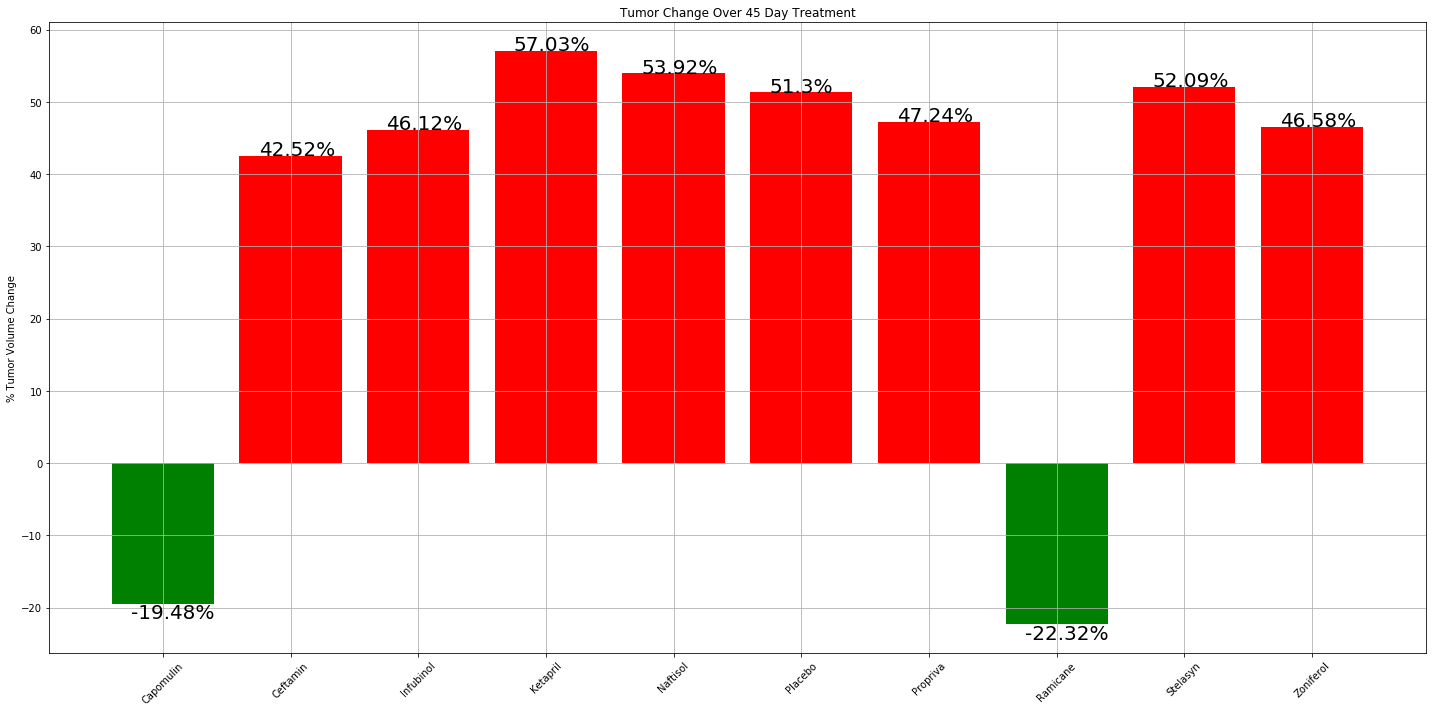

In [14]:
# Generate the Bar Graph
drugnames = tumorchgdf["Drug"].unique().tolist()
percentchanges = tumorchgdf["Percent Change"]
colors=[]
xtics = np.arange(len(drugnames))
for chg in percentchanges:
    if chg < 0:
        color="green"
    elif chg > 0:
        color="red"
    else:
        color="gray"
    colors.append(color)

plt.figure(figsize=(20,10))
plt.bar(xtics,percentchanges,color=colors)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

for i, v in enumerate(percentchanges):
    if v >= 0:
        vloc = v + 0.1
    else:
        vloc = v - 2
    plt.text(xtics[i]-.25, vloc, str(round(v,2))+"%",fontsize=20)
    
plt.xticks(xtics,drugnames,rotation=45)
plt.grid()
plt.tight_layout()
# Save the Figure
plt.savefig("TumorPercentChange.png")

# Show the Figure
plt.show()